In [1]:
import json
import pandas as pd
import numpy as np


In [2]:
with open('dtypes.json', 'r') as fa:
    dtyp = json.load(fa)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer

In [4]:
dtyp

{'id': 'float',
 'flag_tsunami': 'str',
 'year': 'float',
 'month': 'float',
 'day': 'float',
 'hour': 'float',
 'minute': 'float',
 'second': 'float',
 'focal_depth': 'float',
 'eq_primary': 'float',
 'eq_mag_mw': 'float',
 'eq_mag_ms': 'float',
 'eq_mag_mb': 'float',
 'intensity': 'float',
 'country': 'str',
 'state': 'str',
 'location_name': 'str',
 'latitude': 'float',
 'longitude': 'float',
 'region_code': 'str',
 'injuries': 'float',
 'injuries_description': 'str',
 'damage_millions_dollars': 'float',
 'damage_description': 'str',
 'total_injuries': 'float',
 'total_injuries_description': 'str',
 'total_damage_millions_dollars': 'float',
 'total_damage_description': 'str'}

In [5]:
dfa = pd.read_csv('earthquake_data.csv', dtype=dtyp)

In [6]:
dfa 

id flag_tsunami    year  month   day  hour  minute  second  \
0       338.0           No  1048.0    NaN   NaN   NaN     NaN     NaN   
1       771.0          Tsu  1580.0    4.0   6.0   NaN     NaN     NaN   
2      7889.0          Tsu  1757.0    7.0  15.0   NaN     NaN     NaN   
3      6697.0          Tsu  1500.0    NaN   NaN   NaN     NaN     NaN   
4      6013.0          Tsu  1668.0    4.0  13.0   NaN     NaN     NaN   
...       ...          ...     ...    ...   ...   ...     ...     ...   
6067   5360.0          Tsu  1993.0    8.0   8.0   8.0    34.0    24.9   
6068   5009.0           No  1983.0   12.0  22.0   1.0     2.0     2.4   
6069  10307.0           No  2018.0    2.0  25.0  17.0    44.0    43.0   
6070   5498.0           No  1998.0    7.0   9.0   5.0    19.0     7.3   
6071   5459.0           No  1997.0    4.0  22.0   9.0    31.0    23.2   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0             NaN         NaN  ...        NaN          120       NaN   
1            33.0         6.2  ...      1.309          120       NaN   
2             NaN         NaN  ...     -6.320          120       NaN   
3             NaN         NaN  ...        NaN          150       NaN   
4             NaN         NaN  ...    -71.050          150       NaN   
...           ...         ...  ...        ...          ...       ...   
6067         59.0         7.8  ...    144.801          170      48.0   
6068         26.0         6.4  ...    151.868          170       NaN   
6069         23.0         7.5  ...    142.768          170     300.0   
6070         10.0         6.2  ...    -28.626          130     100.0   
6071          5.0         6.7  ...    -60.892           90       2.0   

      injuries_description damage_millions_dollars damage_description  \
0                      NaN                     NaN                NaN   
1                      NaN                     NaN                  2   
2                      NaN                     NaN                NaN   
3                      NaN                     NaN                NaN   
4                      NaN                     NaN                NaN   
...                    ...                     ...                ...   
6067                     1                   250.0                  4   
6068                   NaN                    25.0                  4   
6069                     3                    61.0                  4   
6070                     2                    72.0                  4   
6071                     1                    25.0                  4   

     total_injuries  total_injuries_description  \
0               NaN                         NaN   
1               NaN                         NaN   
2               NaN                         NaN   
3               NaN                         NaN   
4               NaN                         NaN   
...             ...                         ...   
6067           48.0                           1   
6068            NaN                         NaN   
6069          300.0                           3   
6070          100.0                           2   
6071            2.0                           1   

      total_damage_millions_dollars total_damage_description  
0                               NaN                      NaN  
1                               NaN                      NaN  
2                               NaN                      NaN  
3                               NaN                      NaN  
4                               NaN                      NaN  
...                             ...                      ...  
6067                          250.0                        4  
6068                           25.0                        4  
6069                           61.0                        4  
6070                           72.0                        4  
6071                           25.0                        4  

[6072 rows x 28 column

In [7]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   float64
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   float64
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [8]:
dfa.shape

(6072, 28)

In [9]:
dfa.describe()

id         year        month          day         hour  \
count   6072.000000  6072.000000  5667.000000  5515.000000  4044.000000   
mean    4658.426219  1802.307477     6.510852    15.734361    11.308605   
std     2924.650010   377.924931     3.450167     8.752862     7.033485   
min        1.000000 -2150.000000     1.000000     1.000000     0.000000   
25%     2142.750000  1818.000000     4.000000     8.000000     5.000000   
50%     4608.500000  1927.000000     7.000000    16.000000    11.000000   
75%     6475.250000  1986.000000     9.000000    23.000000    17.000000   
max    10378.000000  2018.000000    12.000000    31.000000    23.000000   

            minute       second  focal_depth   eq_primary    eq_mag_mw  \
count  3838.000000  2721.000000  3120.000000  4286.000000  1216.000000   
mean     28.855915    29.740243    41.680769     6.471419     6.526563   
std      17.151545    17.132196    71.258782     1.043968     0.937869   
min       0.000000     0.100000     0.000000     1.600000     3.600000   
25%      14.000000    14.800000    11.000000     5.700000     5.800000   
50%      30.000000    29.700000    26.000000     6.500000     6.500000   
75%      44.000000    44.500000    40.000000     7.300000     7.200000   
max      59.000000    59.900000   675.000000     9.500000     9.500000   

         eq_mag_ms    eq_mag_mb    intensity     latitude    longitude  \
count  2916.000000  1786.000000  2748.000000  6018.000000  6022.000000   
mean      6.574451     5.797592     8.325328    22.537909    37.985633   
std       0.989850     0.716809     1.800089    22.787934    86.726852   
min       2.100000     2.100000     2.000000   -62.877000  -179.984000   
25%       5.800000     5.300000     7.000000     9.871750    -8.000000   
50%       6.600000     5.800000     8.000000    32.200000    43.300000   
75%       7.300000     6.300000    10.000000    38.778250   115.500000   
max       9.100000     8.200000    12.000000    73.122000   180.000000   

            injuries  damage_millions_dollars  total_injuries  \
count    1169.000000               478.000000     1184.000000   
mean     2293.579127              1715.606259     2510.967061   
std     27095.202227             12157.409978    28273.298405   
min         1.000000                 0.013000        1.000000   
25%        10.000000                 3.625000       10.000000   
50%        42.000000                20.900000       42.500000   
75%       200.000000               204.350000      200.000000   
max    799000.000000            220000.000000   799000.000000   

       total_damage_millions_dollars  
count                     418.000000  
mean                     1978.743206  
std                     12988.187606  
min                         0.010000  
25%                         4.310000  
50%                        28.000000  
75%                       300.000000  
max                    220085.456000

In [10]:
dfa.describe().T

count         mean           std       min  \
id                             6072.0  4658.426219   2924.650010     1.000   
year                           6072.0  1802.307477    377.924931 -2150.000   
month                          5667.0     6.510852      3.450167     1.000   
day                            5515.0    15.734361      8.752862     1.000   
hour                           4044.0    11.308605      7.033485     0.000   
minute                         3838.0    28.855915     17.151545     0.000   
second                         2721.0    29.740243     17.132196     0.100   
focal_depth                    3120.0    41.680769     71.258782     0.000   
eq_primary                     4286.0     6.471419      1.043968     1.600   
eq_mag_mw                      1216.0     6.526563      0.937869     3.600   
eq_mag_ms                      2916.0     6.574451      0.989850     2.100   
eq_mag_mb                      1786.0     5.797592      0.716809     2.100   
intensity                      2748.0     8.325328      1.800089     2.000   
latitude                       6018.0    22.537909     22.787934   -62.877   
longitude                      6022.0    37.985633     86.726852  -179.984   
injuries                       1169.0  2293.579127  27095.202227     1.000   
damage_millions_dollars         478.0  1715.606259  12157.409978     0.013   
total_injuries                 1184.0  2510.967061  28273.298405     1.000   
total_damage_millions_dollars   418.0  1978.743206  12988.187606     0.010   

                                      25%     50%         75%         max  
id                             2142.75000  4608.5  6475.25000   10378.000  
year                           1818.00000  1927.0  1986.00000    2018.000  
month                             4.00000     7.0     9.00000      12.000  
day                               8.00000    16.0    23.00000      31.000  
hour                              5.00000    11.0    17.00000      23.000  
minute                           14.00000    30.0    44.00000      59.000  
second                           14.80000    29.7    44.50000      59.900  
focal_depth                      11.00000    26.0    40.00000     675.000  
eq_primary                        5.70000     6.5     7.30000       9.500  
eq_mag_mw                         5.80000     6.5     7.20000       9.500  
eq_mag_ms                         5.80000     6.6     7.30000       9.100  
eq_mag_mb                         5.30000     5.8     6.30000       8.200  
intensity                         7.00000     8.0    10.00000      12.000  
latitude                          9.87175    32.2    38.77825      73.122  
longitude                        -8.00000    43.3   115.50000     180.000  
injuries                         10.00000    42.0   200.00000  799000.000  
damage_millions_dollars           3.62500    20.9   204.35000  220000.000  
total_injuries                   10.00000    42.5   200.00000  799000.000  
total_damage_millions_dollars     4.31000    28.0   300.00000  220085.456

In [11]:
mask = dfa.isnull()
total = mask.sum()
per = 100*mask.mean()

In [12]:
data_missing = pd.concat([total, per], axis = 1, join='outer',
                        keys = ['missing_count', 'missing_perc'])

In [13]:
data_missing

missing_count  missing_perc
id                                         0      0.000000
flag_tsunami                               0      0.000000
year                                       0      0.000000
month                                    405      6.669960
day                                      557      9.173254
hour                                    2028     33.399209
minute                                  2234     36.791831
second                                  3351     55.187747
focal_depth                             2952     48.616601
eq_primary                              1786     29.413702
eq_mag_mw                               4856     79.973650
eq_mag_ms                               3156     51.976285
eq_mag_mb                               4286     70.586298
intensity                               3324     54.743083
country                                    0      0.000000
state                                   5764     94.927536
location_name                              1      0.016469
latitude                                  54      0.889328
longitude                                 50      0.823452
region_code                                0      0.000000
injuries                                4903     80.747694
injuries_description                    4723     77.783267
damage_millions_dollars                 5594     92.127800
damage_description                      1745     28.738472
total_injuries                          4888     80.500659
total_injuries_description              4715     77.651515
total_damage_millions_dollars           5654     93.115942
total_damage_description                2924     48.155468

In [14]:
data_missing.sort_values(by='missing_perc', inplace=True, ascending=False)

In [15]:
data_missing

missing_count  missing_perc
state                                   5764     94.927536
total_damage_millions_dollars           5654     93.115942
damage_millions_dollars                 5594     92.127800
injuries                                4903     80.747694
total_injuries                          4888     80.500659
eq_mag_mw                               4856     79.973650
injuries_description                    4723     77.783267
total_injuries_description              4715     77.651515
eq_mag_mb                               4286     70.586298
second                                  3351     55.187747
intensity                               3324     54.743083
eq_mag_ms                               3156     51.976285
focal_depth                             2952     48.616601
total_damage_description                2924     48.155468
minute                                  2234     36.791831
hour                                    2028     33.399209
eq_primary                              1786     29.413702
damage_description                      1745     28.738472
day                                      557      9.173254
month                                    405      6.669960
latitude                                  54      0.889328
longitude                                 50      0.823452
location_name                              1      0.016469
id                                         0      0.000000
region_code                                0      0.000000
flag_tsunami                               0      0.000000
year                                       0      0.000000
country                                    0      0.000000

In [16]:
mask.any()

id                               False
flag_tsunami                     False
year                             False
month                             True
day                               True
hour                              True
minute                            True
second                            True
focal_depth                       True
eq_primary                        True
eq_mag_mw                         True
eq_mag_ms                         True
eq_mag_mb                         True
intensity                         True
country                          False
state                             True
location_name                     True
latitude                          True
longitude                         True
region_code                      False
injuries                          True
injuries_description              True
damage_millions_dollars           True
damage_description                True
total_injuries                    True
total_injuries_descriptio

In [17]:
nullable_columns = list(dfa.columns[mask.any()])

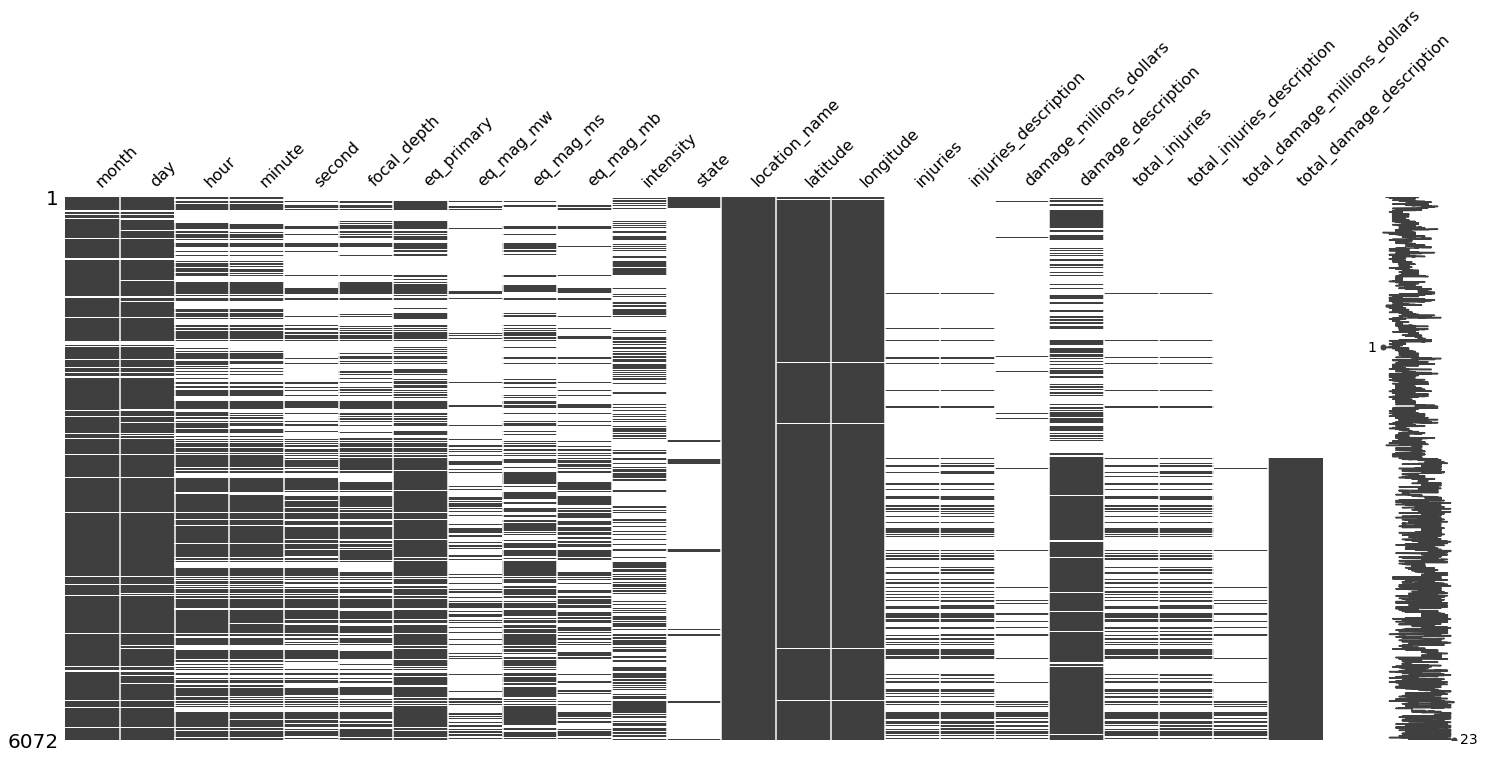

In [18]:
msno.matrix(dfa[nullable_columns])
plt.show()

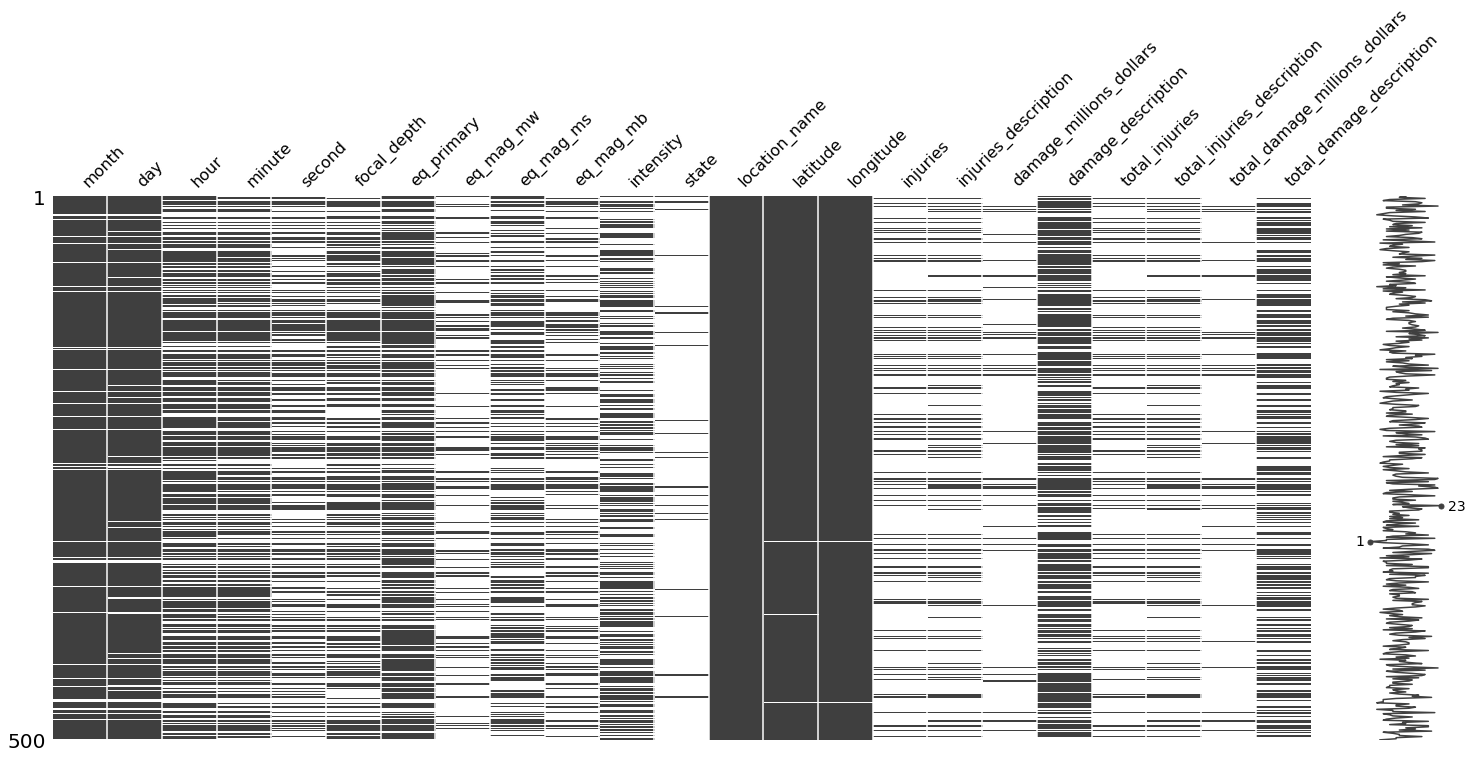

In [19]:
msno.matrix(dfa[nullable_columns].sample(500))
plt.show()

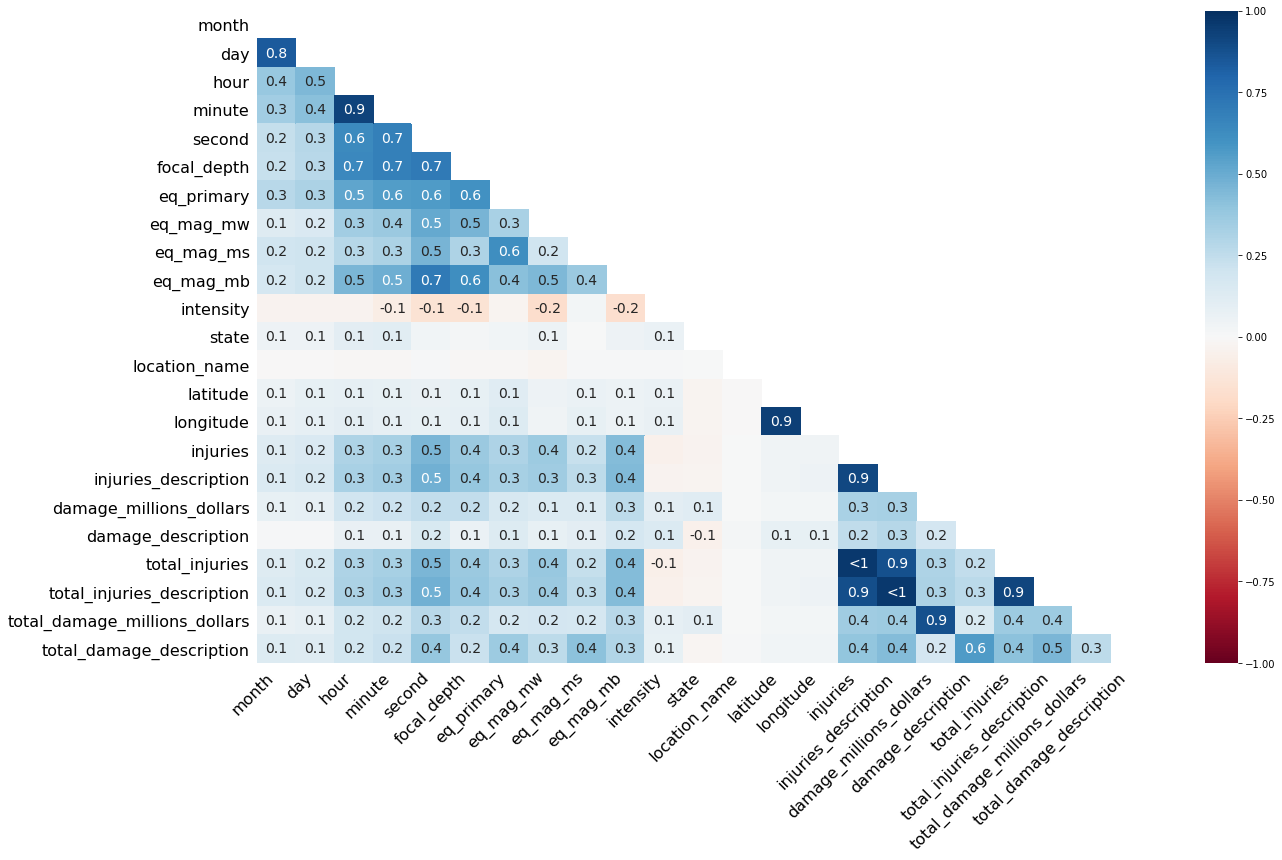

In [21]:
msno.heatmap(dfa[nullable_columns])
plt.show()

In [22]:
dfa

id flag_tsunami    year  month   day  hour  minute  second  \
0       338.0           No  1048.0    NaN   NaN   NaN     NaN     NaN   
1       771.0          Tsu  1580.0    4.0   6.0   NaN     NaN     NaN   
2      7889.0          Tsu  1757.0    7.0  15.0   NaN     NaN     NaN   
3      6697.0          Tsu  1500.0    NaN   NaN   NaN     NaN     NaN   
4      6013.0          Tsu  1668.0    4.0  13.0   NaN     NaN     NaN   
...       ...          ...     ...    ...   ...   ...     ...     ...   
6067   5360.0          Tsu  1993.0    8.0   8.0   8.0    34.0    24.9   
6068   5009.0           No  1983.0   12.0  22.0   1.0     2.0     2.4   
6069  10307.0           No  2018.0    2.0  25.0  17.0    44.0    43.0   
6070   5498.0           No  1998.0    7.0   9.0   5.0    19.0     7.3   
6071   5459.0           No  1997.0    4.0  22.0   9.0    31.0    23.2   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0             NaN         NaN  ...        NaN          120       NaN   
1            33.0         6.2  ...      1.309          120       NaN   
2             NaN         NaN  ...     -6.320          120       NaN   
3             NaN         NaN  ...        NaN          150       NaN   
4             NaN         NaN  ...    -71.050          150       NaN   
...           ...         ...  ...        ...          ...       ...   
6067         59.0         7.8  ...    144.801          170      48.0   
6068         26.0         6.4  ...    151.868          170       NaN   
6069         23.0         7.5  ...    142.768          170     300.0   
6070         10.0         6.2  ...    -28.626          130     100.0   
6071          5.0         6.7  ...    -60.892           90       2.0   

      injuries_description damage_millions_dollars damage_description  \
0                      NaN                     NaN                NaN   
1                      NaN                     NaN                  2   
2                      NaN                     NaN                NaN   
3                      NaN                     NaN                NaN   
4                      NaN                     NaN                NaN   
...                    ...                     ...                ...   
6067                     1                   250.0                  4   
6068                   NaN                    25.0                  4   
6069                     3                    61.0                  4   
6070                     2                    72.0                  4   
6071                     1                    25.0                  4   

     total_injuries  total_injuries_description  \
0               NaN                         NaN   
1               NaN                         NaN   
2               NaN                         NaN   
3               NaN                         NaN   
4               NaN                         NaN   
...             ...                         ...   
6067           48.0                           1   
6068            NaN                         NaN   
6069          300.0                           3   
6070          100.0                           2   
6071            2.0                           1   

      total_damage_millions_dollars total_damage_description  
0                               NaN                      NaN  
1                               NaN                      NaN  
2                               NaN                      NaN  
3                               NaN                      NaN  
4                               NaN                      NaN  
...                             ...                      ...  
6067                          250.0                        4  
6068                           25.0                        4  
6069                           61.0                        4  
6070                           72.0                        4  
6071                           25.0                        4  

[6072 rows x 28 column

In [24]:
cols = list(dfa.columns)

In [25]:
cols

['id',
 'flag_tsunami',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'focal_depth',
 'eq_primary',
 'eq_mag_mw',
 'eq_mag_ms',
 'eq_mag_mb',
 'intensity',
 'country',
 'state',
 'location_name',
 'latitude',
 'longitude',
 'region_code',
 'injuries',
 'injuries_description',
 'damage_millions_dollars',
 'damage_description',
 'total_injuries',
 'total_injuries_description',
 'total_damage_millions_dollars',
 'total_damage_description']

In [26]:
temp_time = ['month','day','hour','minute','second']

In [27]:
dfa[temp_time] = dfa[temp_time].fillna(0)

In [28]:
dfa[temp_time].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   6072 non-null   float64
 1   day     6072 non-null   float64
 2   hour    6072 non-null   float64
 3   minute  6072 non-null   float64
 4   second  6072 non-null   float64
dtypes: float64(5)
memory usage: 237.3 KB


In [29]:
dfa[temp_time].describe()

month          day         hour       minute       second
count  6072.000000  6072.000000  6072.000000  6072.000000  6072.000000
mean      6.076581    14.291008     7.531621    18.239295    13.327273
std       3.707947     9.498102     7.835569    19.483240    18.715739
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       3.000000     6.000000     0.000000     0.000000     0.000000
50%       6.000000    14.000000     5.000000    12.000000     0.000000
75%       9.000000    23.000000    14.000000    35.000000    26.300000
max      12.000000    31.000000    23.000000    59.000000    59.900000

#### scikit-learn

In [30]:
cols

['id',
 'flag_tsunami',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'focal_depth',
 'eq_primary',
 'eq_mag_mw',
 'eq_mag_ms',
 'eq_mag_mb',
 'intensity',
 'country',
 'state',
 'location_name',
 'latitude',
 'longitude',
 'region_code',
 'injuries',
 'injuries_description',
 'damage_millions_dollars',
 'damage_description',
 'total_injuries',
 'total_injuries_description',
 'total_damage_millions_dollars',
 'total_damage_description']

In [31]:
description = ['injuries_description','damage_description','total_injuries_description',
               'total_damage_description']

In [32]:
obja = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')

In [35]:
dfa[description] = obja.fit_transform(dfa[description])

In [36]:
dfa[description].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   injuries_description        6072 non-null   object
 1   damage_description          6072 non-null   object
 2   total_injuries_description  6072 non-null   object
 3   total_damage_description    6072 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


In [37]:
cols

['id',
 'flag_tsunami',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'focal_depth',
 'eq_primary',
 'eq_mag_mw',
 'eq_mag_ms',
 'eq_mag_mb',
 'intensity',
 'country',
 'state',
 'location_name',
 'latitude',
 'longitude',
 'region_code',
 'injuries',
 'injuries_description',
 'damage_millions_dollars',
 'damage_description',
 'total_injuries',
 'total_injuries_description',
 'total_damage_millions_dollars',
 'total_damage_description']

In [38]:
dfa

id flag_tsunami    year  month   day  hour  minute  second  \
0       338.0           No  1048.0    0.0   0.0   0.0     0.0     0.0   
1       771.0          Tsu  1580.0    4.0   6.0   0.0     0.0     0.0   
2      7889.0          Tsu  1757.0    7.0  15.0   0.0     0.0     0.0   
3      6697.0          Tsu  1500.0    0.0   0.0   0.0     0.0     0.0   
4      6013.0          Tsu  1668.0    4.0  13.0   0.0     0.0     0.0   
...       ...          ...     ...    ...   ...   ...     ...     ...   
6067   5360.0          Tsu  1993.0    8.0   8.0   8.0    34.0    24.9   
6068   5009.0           No  1983.0   12.0  22.0   1.0     2.0     2.4   
6069  10307.0           No  2018.0    2.0  25.0  17.0    44.0    43.0   
6070   5498.0           No  1998.0    7.0   9.0   5.0    19.0     7.3   
6071   5459.0           No  1997.0    4.0  22.0   9.0    31.0    23.2   

      focal_depth  eq_primary  ...  longitude  region_code  injuries  \
0             NaN         NaN  ...        NaN          120       NaN   
1            33.0         6.2  ...      1.309          120       NaN   
2             NaN         NaN  ...     -6.320          120       NaN   
3             NaN         NaN  ...        NaN          150       NaN   
4             NaN         NaN  ...    -71.050          150       NaN   
...           ...         ...  ...        ...          ...       ...   
6067         59.0         7.8  ...    144.801          170      48.0   
6068         26.0         6.4  ...    151.868          170       NaN   
6069         23.0         7.5  ...    142.768          170     300.0   
6070         10.0         6.2  ...    -28.626          130     100.0   
6071          5.0         6.7  ...    -60.892           90       2.0   

      injuries_description damage_millions_dollars damage_description  \
0                       NA                     NaN                 NA   
1                       NA                     NaN                  2   
2                       NA                     NaN                 NA   
3                       NA                     NaN                 NA   
4                       NA                     NaN                 NA   
...                    ...                     ...                ...   
6067                     1                   250.0                  4   
6068                    NA                    25.0                  4   
6069                     3                    61.0                  4   
6070                     2                    72.0                  4   
6071                     1                    25.0                  4   

     total_injuries  total_injuries_description  \
0               NaN                          NA   
1               NaN                          NA   
2               NaN                          NA   
3               NaN                          NA   
4               NaN                          NA   
...             ...                         ...   
6067           48.0                           1   
6068            NaN                          NA   
6069          300.0                           3   
6070          100.0                           2   
6071            2.0                           1   

      total_damage_millions_dollars total_damage_description  
0                               NaN                       NA  
1                               NaN                       NA  
2                               NaN                       NA  
3                               NaN                       NA  
4                               NaN                       NA  
...                             ...                      ...  
6067                          250.0                        4  
6068                           25.0                        4  
6069                           61.0                        4  
6070                           72.0                        4  
6071                           25.0                        4  

[6072 rows x 28 column

how many rows have damage_million_dollar values <br>
how many of those have non_null damage_description values <br>

dfa['damage_description'] <br>
dfa.damage_description <br>

In [42]:


dfa[pd.isnull(dfa.damage_millions_dollars)].shape[0]

5594

In [45]:
dfa[pd.isnull(dfa.damage_millions_dollars) & (dfa.damage_description != 'NA')].shape[0]

3849

In [46]:
means_category = dfa[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()

In [47]:
means_category

damage_millions_dollars
damage_description                         
1                                  0.417211
2                                  3.078840
3                                 13.818806
4                               3574.998799
NA                                      NaN

In [48]:
replacement_values = means_category.damage_millions_dollars.to_dict()

In [49]:
replacement_values

{'1': 0.4172105263157895,
 '2': 3.0788402777777772,
 '3': 13.818805970149256,
 '4': 3574.9987991266385,
 'NA': nan}

In [50]:
replacement_values['NA'] = -1
replacement_values['0'] = 0

In [51]:
replacement_values

{'1': 0.4172105263157895,
 '2': 3.0788402777777772,
 '3': 13.818805970149256,
 '4': 3574.9987991266385,
 'NA': -1,
 '0': 0}

In [52]:
imputed_values = dfa.damage_description.map(replacement_values)

In [56]:
dfa['damage_millions_dollars'] = np.where(dfa.damage_millions_dollars.isnull(), imputed_values, dfa.damage_millions_dollars)

In [58]:
dfa[['damage_millions_dollars']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   damage_millions_dollars  6072 non-null   float64
dtypes: float64(1)
memory usage: 47.6 KB


In [59]:
dfa['flag_tsunami']

0        No
1       Tsu
2       Tsu
3       Tsu
4       Tsu
       ... 
6067    Tsu
6068     No
6069     No
6070     No
6071     No
Name: flag_tsunami, Length: 6072, dtype: object

In [60]:
dfa['flag_tsunami'].unique()

array(['No', 'Tsu'], dtype=object)

In [61]:
dfa.flag_tsunami.value_counts()

No     4270
Tsu    1802
Name: flag_tsunami, dtype: int64

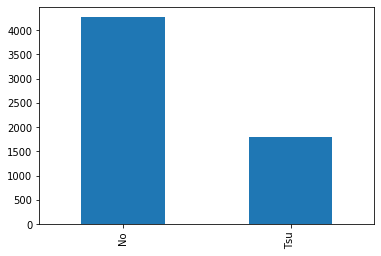

In [63]:
dfa.flag_tsunami.value_counts().plot(kind='bar')
plt.show()

In [65]:
dfa.dtypes

id                               float64
flag_tsunami                      object
year                             float64
month                            float64
day                              float64
hour                             float64
minute                           float64
second                           float64
focal_depth                      float64
eq_primary                       float64
eq_mag_mw                        float64
eq_mag_ms                        float64
eq_mag_mb                        float64
intensity                        float64
country                           object
state                             object
location_name                     object
latitude                         float64
longitude                        float64
region_code                       object
injuries                         float64
injuries_description              object
damage_millions_dollars          float64
damage_description                object
total_injuries  

In [66]:
numerics = dfa.select_dtypes(include=[np.number])

In [67]:
numerics.columns

Index(['id', 'year', 'month', 'day', 'hour', 'minute', 'second', 'focal_depth',
       'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
       'latitude', 'longitude', 'injuries', 'damage_millions_dollars',
       'total_injuries', 'total_damage_millions_dollars'],
      dtype='object')

In [68]:
objects = dfa.select_dtypes(include=[np.object])

In [69]:
objects.columns

Index(['flag_tsunami', 'country', 'state', 'location_name', 'region_code',
       'injuries_description', 'damage_description',
       'total_injuries_description', 'total_damage_description'],
      dtype='object')

In [71]:
sorted(dfa['month'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

In [72]:
numerics.nunique()

id                               6072
year                              946
month                              13
day                                32
hour                               24
minute                             60
second                            576
focal_depth                       197
eq_primary                         64
eq_mag_mw                          54
eq_mag_ms                          55
eq_mag_mb                          47
intensity                          11
latitude                         2885
longitude                        3654
injuries                          338
damage_millions_dollars           248
total_injuries                    344
total_damage_millions_dollars     233
dtype: int64

In [73]:
len(dfa)

6072

In [74]:
numerics.nunique().sort_values()

intensity                          11
month                              13
hour                               24
day                                32
eq_mag_mb                          47
eq_mag_mw                          54
eq_mag_ms                          55
minute                             60
eq_primary                         64
focal_depth                       197
total_damage_millions_dollars     233
damage_millions_dollars           248
injuries                          338
total_injuries                    344
second                            576
year                              946
latitude                         2885
longitude                        3654
id                               6072
dtype: int64

In [75]:
dfa.shape

(6072, 28)

In [76]:
objects.nunique().sort_values()

flag_tsunami                     2
injuries_description             5
damage_description               5
total_injuries_description       5
total_damage_description         5
region_code                     18
state                           29
country                        155
location_name                 3821
dtype: int64

In [77]:
inj_des_counts = dfa.injuries_description.value_counts()

In [78]:
inj_des_counts

NA    4723
1      666
3      347
2      193
4      143
Name: injuries_description, dtype: int64

In [81]:
dfa.injuries_description.value_counts(dropna=False)

NA    4723
1      666
3      347
2      193
4      143
Name: injuries_description, dtype: int64

In [82]:
type(inj_des_counts)

pandas.core.series.Series

In [83]:
inj_des_counts.reset_index().sort_values('index')

index  injuries_description
1     1                   666
3     2                   193
2     3                   347
4     4                   143
0    NA                  4723

In [84]:
dd_counts = dfa.damage_description.value_counts()
dd_counts = dd_counts.sort_index()

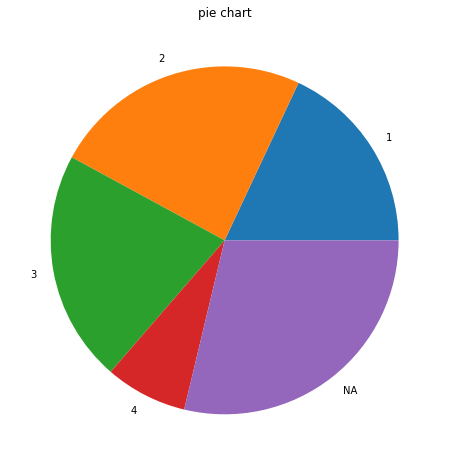

In [87]:
e = [0, 0, 0, 0.07, 0]

plt.figure(figsize=(8,8))
plt.pie(dd_counts, labels=dd_counts.index)
plt.title('pie chart')
plt.show()

In [89]:
dfa.loc[:, 'flag_tsunami'] = dfa.flag_tsunami.apply(lambda x: int(str(x) == 'Tsu'))

In [90]:
cols

['id',
 'flag_tsunami',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'focal_depth',
 'eq_primary',
 'eq_mag_mw',
 'eq_mag_ms',
 'eq_mag_mb',
 'intensity',
 'country',
 'state',
 'location_name',
 'latitude',
 'longitude',
 'region_code',
 'injuries',
 'injuries_description',
 'damage_millions_dollars',
 'damage_description',
 'total_injuries',
 'total_injuries_description',
 'total_damage_millions_dollars',
 'total_damage_description']

In [91]:
temp = dfa[~pd.isnull(dfa.intensity)][['intensity', 'flag_tsunami']]

In [92]:
plot_data = temp.groupby('intensity').sum()

In [93]:
plot_data

flag_tsunami
intensity              
2.0                   0
3.0                   8
4.0                  19
5.0                  38
6.0                  63
7.0                  91
8.0                 119
9.0                 132
10.0                130
11.0                 58
12.0                  4

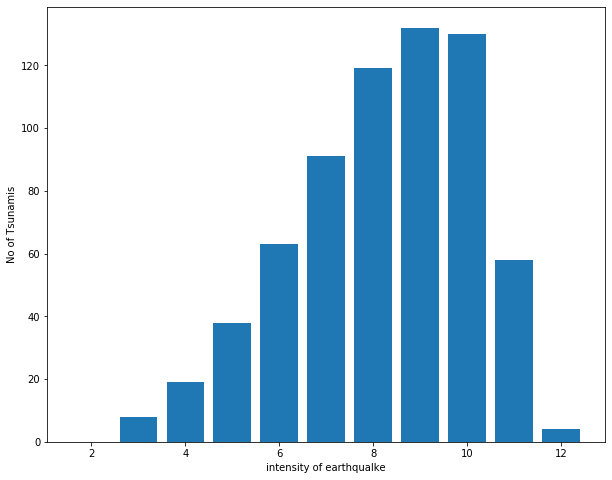

In [95]:
plt.figure(figsize=(10,8))
plt.bar(plot_data.index, plot_data.flag_tsunami)
plt.xlabel("intensity of earthqualke")
plt.ylabel("No of Tsunamis")
plt.show()

In [96]:
data_group = dfa.groupby(['intensity', 'flag_tsunami']).size()

In [97]:
data_group

intensity  flag_tsunami
2.0        0                 5
3.0        0                10
           1                 8
4.0        0                37
           1                19
5.0        0                74
           1                38
6.0        0               151
           1                63
7.0        0               342
           1                91
8.0        0               470
           1               119
9.0        0               356
           1               132
10.0       0               494
           1               130
11.0       0                79
           1                58
12.0       0                68
           1                 4
dtype: int64

In [98]:
plot_data = data_group.unstack()

In [99]:
plot_data

flag_tsunami      0      1
intensity                 
2.0             5.0    NaN
3.0            10.0    8.0
4.0            37.0   19.0
5.0            74.0   38.0
6.0           151.0   63.0
7.0           342.0   91.0
8.0           470.0  119.0
9.0           356.0  132.0
10.0          494.0  130.0
11.0           79.0   58.0
12.0           68.0    4.0

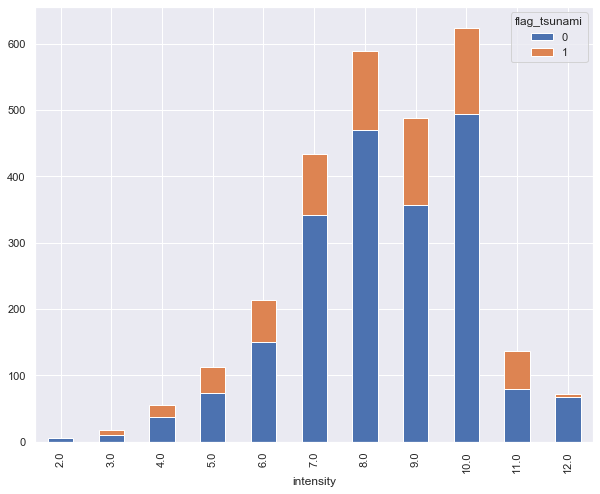

In [102]:
sns.set()
plot_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.show()

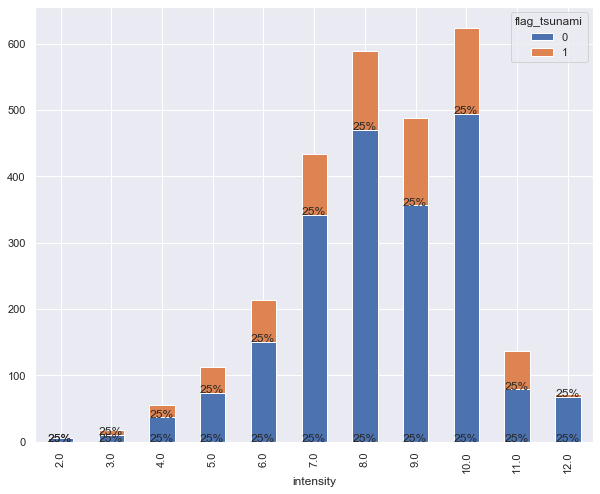

In [105]:
ax = plot_data.plot(kind='bar', stacked=True, figsize=(10, 8))

for val in ax.patches:
    percentage = '25%'
    width = val.get_width()
    height = val.get_height()
    x, y = val.get_xy()
#    x = val.get_x() + val.get_width()
#    y = val.get_x() + val.get_height()/2
    ax.annotate(percentage, (x,y))
plt.show()

In [104]:
plot_data

flag_tsunami      0      1
intensity                 
2.0             5.0    NaN
3.0            10.0    8.0
4.0            37.0   19.0
5.0            74.0   38.0
6.0           151.0   63.0
7.0           342.0   91.0
8.0           470.0  119.0
9.0           356.0  132.0
10.0          494.0  130.0
11.0           79.0   58.0
12.0           68.0    4.0

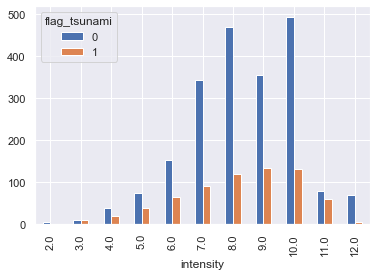

In [106]:
ax = plot_data.plot(kind='bar')
plt.show()

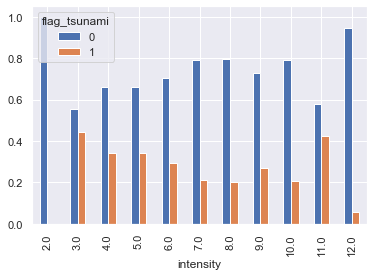

In [107]:
ax = (plot_data.div(plot_data.sum(1), axis=0)).plot(kind='bar')
plt.show()

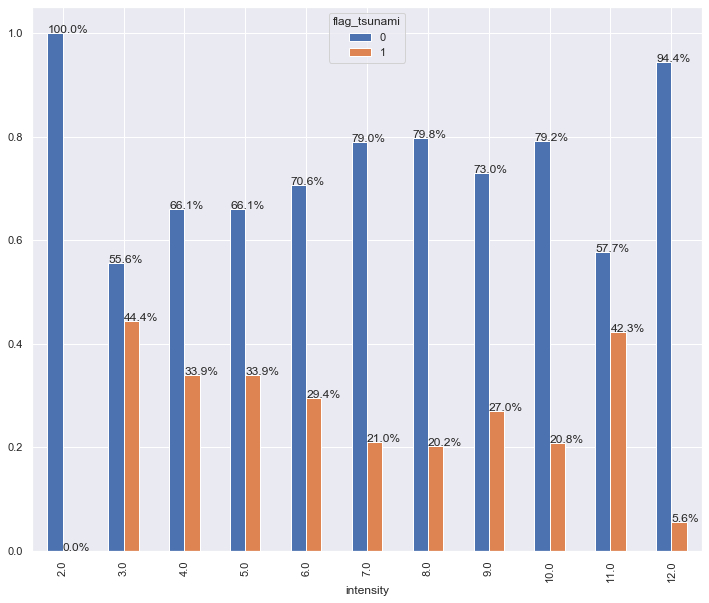

In [111]:
ax = (plot_data.div(plot_data.sum(1), axis=0)).plot(kind='bar', figsize=(12, 10))

for val in ax.patches:
    percentage = '25%'
    width = val.get_width()
    height = val.get_height()
    x, y = val.get_xy()
    ax.annotate('{:.1%}'.format(height), (x, y+height))

In [116]:
data_1 = sns.load_dataset("plot_data")
total = len(data)
ax = sns.countplot(x='intensity', data=data_1)
plot_data

HTTPError: HTTP Error 404: Not Found

In [115]:
type(plot_data)

pandas.core.frame.DataFrame

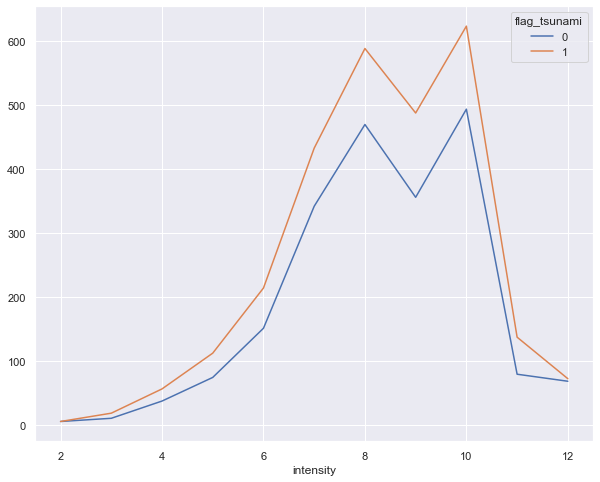

In [117]:
sns.set()
plot_data.plot(stacked=True, figsize=(10, 8))
plt.show()